# The Birthday Paradox

**Raf Ledeganck** <br>
01 DEC 2022

*Syntra Data Science 2022-2023*

Tim verwacht dat de werkelijke grafiek naar rechts verschoven zou moeten zijn tgo. de theoretische lijn. <br>
Uitgetest in § "Theory vs. simulations"

Daarnaast vroeg ik me nog af wat het verschil zou zijn als de theoretische formule niet vereenvoudigd zou zijn. <br>
Uitgetest in § "Theory simplified vs. accurate"

## Required packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

## Functions

In [2]:
def generate_dates(no_of_dates):
    """Generate arbitrary birthdays with max. age = 100Y from today
    
    Parameters:
    - no_of_dates: Number of birthdays to be generated ; int
        
    Returns:
    - Dates in format DD/MM ; array(:,1)
    
    """
    #Reserve empty array in memory
    dates = np.full(no_of_dates, '00/00')

    #Generate random dates between today and 100Y back (rounded to 365 days/year)
    for i in range(0, no_of_dates):
        max_age = 100 * 365
        random_days = random.randint(0,max_age)
        random_date = datetime.datetime.today() - datetime.timedelta(days=random_days)
        dates[i] = str(random_date.day) + '/' + str(random_date.month)

    return(dates)

In [3]:
def prep_dates(file, option):
    """Trim dates as specified by option
    
    Parameters:
    - file: Dates in format DD/MM/YYYY ; array(:,1)
    - option = 'days': separate DD from DD/MM/YYYY
               'months': separate MM from DD/MM/YYYY
               'dates': separate DD/MM from DD/MM/YYYY
        
    Returns:
    - Trimmed dates ; array(:,1)
    
    """
    #Reserve empty array in memory
    if option == 'days' or option == 'months':
        dates = np.zeros(len(file), dtype=int)
    elif option == 'dates':
        dates = np.full(len(file), '00/00')
    
    #Fill array
    i = 0
    if option == 'days':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[0]
    elif option == 'months':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[1]
    elif option == 'dates':
        for i in range(0,len(file)):
            dates[i] = file[i].split('/')[0] + '/' + file[i].split('/')[1]

    return(dates)

In [4]:
def find_duplicates(array):
    """Check if there are duplicates in an array
    
    Parameters:
    - array: Values among which to search for duplicate; array(:,1)
        
    Returns:
    - List with number of duplicates
    
    """
    sorted_array = np.sort(array)
    duplicates = list()
    for i in range(1, len(array)):
        if sorted_array[i] == sorted_array[i-1]:
            duplicates.append(sorted_array[i])
    return(duplicates)

In [5]:
def draw_samples(array, no_of_samples=1, sample_size=1):
    """Calculate how many duplicates can be found when drawing samples from an array
    
    Parameters:
    - array: Values among which to search for duplicates; array(:,1)
    - no_of_samples: Number of samples to be drawn ; int
    - sample_size: Number of values in a single draw ; int
        
    Returns:
    - List with number of duplicates for the draws in which there were duplicates
    
    """
    list_of_duplicates = list()
    for i in range(0, no_of_samples):
        draw = np.random.choice(array, size=sample_size, replace=False)
        duplicates = find_duplicates(draw)
        no_of_duplicates = len(duplicates)
        if no_of_duplicates != 0:
            list_of_duplicates.append(no_of_duplicates)
    return(list_of_duplicates)

In [6]:
def calc_chance_by_sample_size(array, draws=10, max_sample=25):
    """Calculate how many duplicates can be found when drawing samples from an array
    
    Parameters:
    - array: Values among which to search for duplicates; array(:,1)
    - draws: Number of samples to be drawn ; int
    - max_sample_size: Number of values in a single draw ; int
        
    Returns:
    - Array with % of duplicates by number of draws ; array(:,1)
      Index in array corresponds with the size of the samples drawn.
    
    """
    #Generate empty array
    chance_per_sample_size = np.zeros(max_sample)
    
    for i in range(0, max_sample):
        #DRAW_SAMPLES returns array with a cell for each draw in which there was at least 1 duplicate
        #LEN(DRAW_SAMPLES) therefore returns the number of draws with at least 1 duplicate
        #division by DRAWS gives % of draws with duplicate
        #index in CHANCE_PER_SAMPLE_SIZE corresponds with size of draws
        chance_per_sample_size[i] = len(draw_samples(array, no_of_samples=draws, sample_size=i))/draws
    
    return(chance_per_sample_size)

In [7]:
def calculate_chance(sample_size):
    """Calculate the chance related to the birthday paradox
    
    Parameters:
    - sample_size: Number of values in a draw ; int
        
    Returns:
    - Chance of finding the same birthday in the given sample size ; float
    
    """
    power = sample_size * ( (sample_size - 1)/2)
    return(1 - ( (364/365) **power ) )

In [69]:
def calculate_chance_accurate(sample_size):
    """Calculate the chance related to the birthday paradox without simplification
    
    Parameters:
    - sample_size: Number of values in a draw ; int
        
    Returns:
    - Chance of finding the same birthday in the given sample size ; float
    
    """
    cum_chance = 1
    
    for i in range(sample_size):
        cum_chance = cum_chance * ( ( (364 - i) / (365 - i) ) ** ( i - 1) )
    
    return(1 - cum_chance)

## Theory vs. simulations

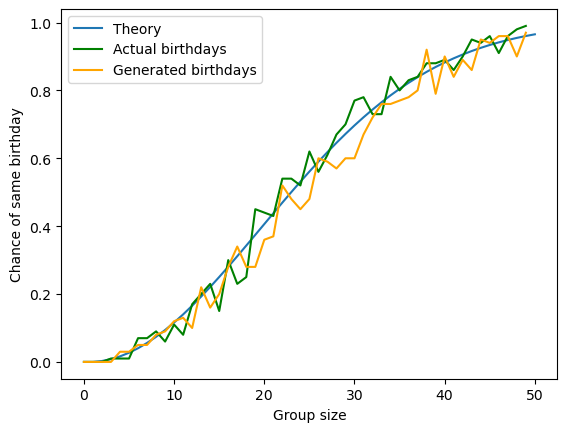

In [54]:
mark_pct=0.5
max_sample = 50
no_of_samples = 10**3

#Generate empty array
calc_chance_per_sample_size = np.zeros(max_sample + 1)
for i in range(0, max_sample + 1):
    calc_chance_per_sample_size[i] = calculate_chance(i)

with open("birthdays_all.csv") as file_name:
    file_1 = np.loadtxt(file_name, dtype='str', skiprows=1)

dates_1 = prep_dates(file_1, 'dates')
dates_gen = generate_dates(no_of_samples)

graph1 = calc_chance_by_sample_size(dates_1, draws=no_of_samples, max_sample=max_sample)
graph2 = calc_chance_by_sample_size(dates_gen, draws=no_of_samples, max_sample=max_sample)

plt.plot(calc_chance_per_sample_size, label='Theory')
plt.plot(graph1, color='green', label='Actual birthdays')
plt.plot(graph2, color='orange', label='Generated birthdays')

plt.xlabel('Group size')
plt.ylabel('Chance of same birthday')

plt.legend(loc='best')
plt.show()

## Theory simplified vs. accurate

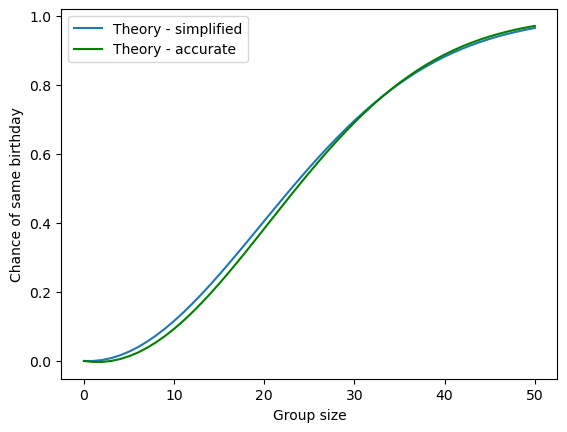

In [70]:
mark_pct=0.5
max_sample = 50
no_of_samples = 10**3

#Generate empty array
calc_chance_simple = np.zeros(max_sample + 1)
calc_chance_accurate = np.zeros(max_sample + 1)

for i in range(0, max_sample + 1):
    calc_chance_simple[i] = calculate_chance(i)
for i in range(0, max_sample + 1):
    calc_chance_accurate[i] = calculate_chance_accurate(i)

plt.plot(calc_chance_simple, label='Theory - simplified')
plt.plot(calc_chance_accurate, color='green', label='Theory - accurate')

plt.xlabel('Group size')
plt.ylabel('Chance of same birthday')

plt.legend(loc='best')
plt.show()